In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
import gc
import time
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
start_time = time.time()
meta_data = pd.read_csv('/content/drive/MyDrive/Multimodal_Single_Cell analysis/metadata.csv', index_col=0)
end_time = time.time()
print(end_time - start_time)
meta_data.head()

1.0105340480804443


,day,donor,cell_type,technology
cell_id,,,,
c2150f55becb,2,27678,HSC,citeseq
65b7edf8a4da,2,27678,HSC,citeseq
c1b26cb1057b,2,27678,EryP,citeseq
917168fa6f83,2,27678,NeuP,citeseq
2b29feeca86d,2,27678,EryP,citeseq


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281528 entries, c2150f55becb to b847ba21f59f
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   day         281528 non-null  int64 
 1   donor       281528 non-null  int64 
 2   cell_type   281528 non-null  object
 3   technology  281528 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.7+ MB


In [ ]:
start_time = time.time()
train = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/train_cite_inputs.h5', stop=33500)
end_time = time.time()
print(end_time - start_time)

19.973628520965576


In [ ]:
train = pd.merge(meta_data, train, how='inner', on=['cell_id'])
train.head()

,day,donor,cell_type,technology,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,2,32606,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,2,32606,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,2,32606,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,3.847321,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,2,32606,NeuP,citeseq,0.0,0.0,0.0,0.0,0.0,0.000000,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,2,32606,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [ ]:
columns_to_drop = ['day', 'donor', 'technology', 'cell_type']
X = train.drop(columns=columns_to_drop, axis=1)
X.head()

,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [ ]:
y = pd.DataFrame()
y["cell_type"] = train["cell_type"]
y.head()

,cell_type
cell_id,
45006fe3e4c8,HSC
d02759a80ba2,HSC
c016c6b0efa5,EryP
ba7f733a4f75,NeuP
fbcf2443ffb2,EryP


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=0)

###Data Preprcessing

In [ ]:
scaler = StandardScaler()
pca = PCA()
normalized_data = scaler.fit_transform(X)

In [ ]:
def pca_retain(X, variance_retained, pca):
    pca_df = pca.fit_transform(normalized_data)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance_ratio >= variance_retained) + 1
    return (pca_df, num_components)

In [ ]:
def perform_pca_test(data, variance_retained, pca):
    normalized_data = scaler.transform(X)
    pca_df = pca.transform(normalized_data)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance_ratio >= variance_retained) + 1
    return (pca_df, num_components)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=0)

In [ ]:
p = pca_retain(X_train, 0.95, pca)

In [ ]:
p

(array([[ 1.7686014e+01, -1.9986866e+01, -4.3589187e+00, ...,
          4.4590429e-08, -2.5483221e-08,  2.7263834e-08],
        [ 2.1922167e+01, -2.0912012e+01, -5.1129088e+00, ...,
         -2.9909879e-09, -1.1966094e-08, -3.9941233e-09],
        [ 4.1504030e+00,  1.5555120e+00,  1.8351963e+01, ...,
          1.7245165e-08,  1.1402283e-08, -1.3978347e-08],
        ...,
        [ 4.1437645e+01,  2.0463562e+01, -7.0301690e+00, ...,
         -2.4113229e-08,  3.1116668e-10,  2.9732846e-08],
        [-1.9720224e+01, -1.1020078e+01,  8.1597462e+00, ...,
          3.9092214e-08,  1.5007070e-09, -7.5684647e-10],
        [-1.8805828e+01,  1.2876579e+01, -2.0172979e+01, ...,
         -3.1974834e-09, -1.2410080e-08, -1.9951621e-08]], dtype=float32),
 15138)

### PCA

In [ ]:
def label_processing(y):
  le = LabelEncoder()
  y = le.fit_transform(y.iloc[:,0])
  y = pd.DataFrame(y)
  return y.values.ravel()

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=p[1])

In [ ]:
def perform_pca(data, pca):
    normalized_data = scaler.fit_transform(data)
    pca_data = pca.fit_transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(p[1])])
    return pca_df

In [ ]:
def perform_pca_test(data, pca):
    normalized_data = scaler.transform(data)
    pca_data = pca.transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(p[1])])
    return pca_df

In [ ]:
start_time = time.time()
X_train_pca = perform_pca(X_train, pca)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 1904.3853430747986


In [ ]:
start_time = time.time()
X_test_pca = perform_pca_test(X_test, pca)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 40.38350582122803


In [ ]:
y_train = label_processing(y_train)
y_test = label_processing(y_test)

In [ ]:
pd.DataFrame(y_train).value_counts()

2    8643
1    3965
6    3529
3    2368
4    1432
5     114
0      49
dtype: int64

### PCA Visualization

<Axes: xlabel='PC1', ylabel='PC2'>

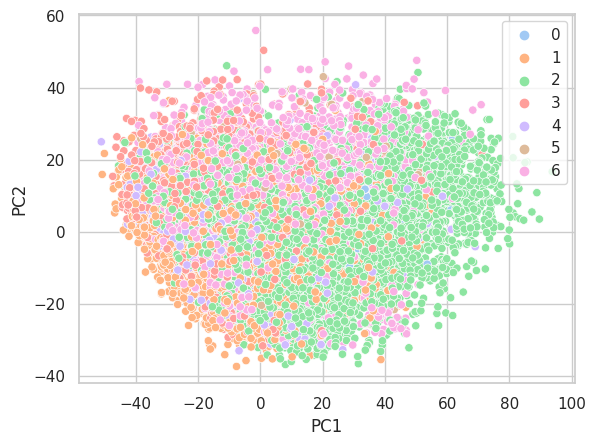

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.scatterplot(data=X_train_pca, x="PC1", y="PC2", hue=y_train, palette="pastel")

In [ ]:
fig = px.scatter_3d(X_train_pca, x="PC1", y="PC2", z="PC3", color=y_train, color_continuous_scale='GnBu')
fig.show()

### Model

XGBClassifier Batch Training

In [ ]:
X_train_pca.shape

(20100, 15138)

In [ ]:
X_train_pca_n = np.array(X_train_pca)
X_test_pca_n = np.array(X_test_pca)

In [ ]:
X_train_pca_n

array([[ 1.3700992e+01,  1.5015535e+01, -4.1991949e+00, ...,
         1.7945034e-03, -2.7088365e-01,  3.0679345e-01],
       [-2.7344873e+01,  3.1553719e+00,  5.5482426e+00, ...,
        -8.3826751e-02, -9.2835903e-02,  2.4216455e-01],
       [-1.8890999e+01, -1.0309171e+01, -1.3569122e+01, ...,
         3.7750283e-01,  1.8690981e-01,  2.1015382e-01],
       ...,
       [ 2.0744526e+01, -5.4097328e+00, -7.9717565e+00, ...,
        -2.6202772e-02, -1.9327059e-01, -1.7400539e-02],
       [-9.5721855e+00,  2.6722041e-01,  2.1740755e+01, ...,
        -2.9398212e-01, -3.9804928e-02,  1.9760008e-01],
       [ 4.2801781e+00,  2.1094215e+01,  2.4942442e+01, ...,
        -1.3580932e-01, -7.2548009e-02,  2.2602972e-02]], dtype=float32)

In [ ]:
y_train

array([6, 3, 2, ..., 2, 1, 1])

In [ ]:
y_test

array([6, 6, 1, ..., 2, 2, 3])

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
size = len(X_train_pca_n)
print("Size of X_train_pca:", size)
for i in range(1, size):
  if (size % i) == 0:
    print(f'{i}', end=' ')

Size of X_train_pca: 20100
1 2 3 4 5 6 10 12 15 20 25 30 50 60 67 75 100 134 150 201 268 300 335 402 670 804 1005 1340 1675 2010 3350 4020 5025 6700 10050 

In [ ]:
batch_size = 3350
col_size = 15138
X_train_batched, y_train_batched = X_train_pca_n.reshape(-1,batch_size,col_size), y_train.reshape(-1,batch_size)

In [ ]:
model_xgbc = XGBClassifier()

In [ ]:
start_time = time.time()
total_rmse=0
for i, (X_batch, y_batch) in enumerate(zip(X_train_batched, y_train_batched)):
    print(f'Step: {i}',end = ' ')
    if i == 0:
        model_xgbc.fit(X_batch, y_batch, verbose=False)
    else:
        model_xgbc.fit(X_batch, y_batch, verbose=False, xgb_model = model_xgbc)
    preds = model_xgbc.predict(X_test_pca_n)
    rmse = mean_squared_error(y_test, preds,squared=False)
    total_rmse+=rmse
end_time = time.time()
print("Time Taken:", end_time - start_time)

Step: 0 Step: 1 Step: 2 Step: 3 Step: 4 Step: 5 Time Taken: 3660.2304141521454


In [ ]:
print(rmse)
print(total_rmse/5)

1.01863238722245
1.2025736141988175


In [ ]:
y_pred = model_xgbc.predict(X_test_pca_n)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8703731343283582
